<a href="https://colab.research.google.com/github/Danhh-zk/Data-Analysis-with-Python-Projects/blob/main/Data__Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Read the tranformed CSV file using pandas

In [ ]:
df = pd.read_csv("/content/transformed_file (2).csv")

In [ ]:
df.head()

,Series_Title,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Released_date,overview,crew,orig_lang,country,Gross,budget,revenue
0,Batman Begins,UA,140,"Action, Adventure",8.2,70.0,Christopher Nolan,1308302,2005-06-16,"Driven by tragedy, billionaire Bruce Wayne ded...","Christian Bale, Bruce Wayne / Batman, Michael ...",English,AU,206852432.0,150000000.0,358858124.0
1,First Blood,A,93,"Action, Adventure",7.7,61.0,Ted Kotcheff,226541,1982-12-03,When former Green Beret John Rambo is harassed...,"Sylvester Stallone, John J. Rambo, Charles A. ...",English,AU,47212904.0,14000000.0,125212904.0
2,Indiana Jones And The Last Crusade,U,127,"Action, Adventure",8.2,65.0,Steven Spielberg,692366,1989-06-08,"In 1938, an art collector appeals to eminent a...","Harrison Ford, Indiana Jones, Sean Connery, He...",English,AU,197171806.0,48000000.0,474171806.0
3,Deadpool,R,108,"Action, Adventure, Comedy",8.0,65.0,Tim Miller,902669,2016-02-11,The origin story of former Special Forces oper...,"Ryan Reynolds, Wade Wilson / Deadpool, Morena ...",English,AU,363070709.0,58000000.0,781947691.0
4,Deadpool 2,R,119,"Action, Adventure, Comedy",7.7,66.0,David Leitch,478586,2018-05-16,Wisecracking mercenary Deadpool battles the ev...,"Ryan Reynolds, Wade Wilson / Deadpool / Jugger...",English,AU,324591735.0,110000000.0,786362370.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Series_Title   636 non-null    object        
 1   Certificate    611 non-null    object        
 2   Runtime        636 non-null    int64         
 3   Genre          636 non-null    object        
 4   IMDB_Rating    636 non-null    float64       
 5   Meta_score     608 non-null    float64       
 6   Director       636 non-null    object        
 7   No_of_Votes    636 non-null    int64         
 8   Released_date  636 non-null    datetime64[ns]
 9   overview       636 non-null    object        
 10  crew           636 non-null    object        
 11  orig_lang      636 non-null    object        
 12  country        636 non-null    object        
 13  Gross          580 non-null    float64       
 14  budget         618 non-null    float64       
 15  revenue        621 non-

Convert 'Released_date' to type datetime (Transformation)

In [ ]:
df['Released_date'] = pd.to_datetime(df['Released_date'])

Remove the spaces from orig_lang column (Transformation)

In [ ]:
df['orig_lang'] = df['orig_lang'].str.replace(' ', '')

In [ ]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,budget,revenue
count,636.000000,636.000000,608.000000,6.360000e+02,5.800000e+02,6.180000e+02,6.210000e+02
mean,123.616352,8.017453,77.498355,3.745764e+05,8.959722e+07,4.257033e+07,6.967637e+08
std,27.019806,2.103277,12.598475,3.569119e+05,1.146642e+08,5.707076e+07,1.203448e+10
min,64.000000,1.000000,28.000000,2.519800e+04,3.296000e+03,9.900000e+02,0.000000e+00
25%,103.750000,7.700000,69.000000,1.153338e+05,1.316737e+07,6.000000e+06,2.658900e+07
50%,120.000000,7.900000,78.000000,2.530805e+05,4.785910e+07,1.900000e+07,8.328230e+07
75%,137.250000,8.100000,87.000000,5.171340e+05,1.205606e+08,5.048673e+07,2.679855e+08
max,238.000000,60.000000,100.000000,2.343110e+06,8.583730e+08,4.000000e+08,3.000000e+11


Data cleaning


Removing duplicates

In [ ]:
df.duplicated().sum() # check how many columns are duplicated

14

In [ ]:
df = df.drop_duplicates() # remove the duplicates

In [ ]:
df.duplicated().sum() # check again how many columns are duplicated

0

<Axes: xlabel='Certificate', ylabel='Count'>

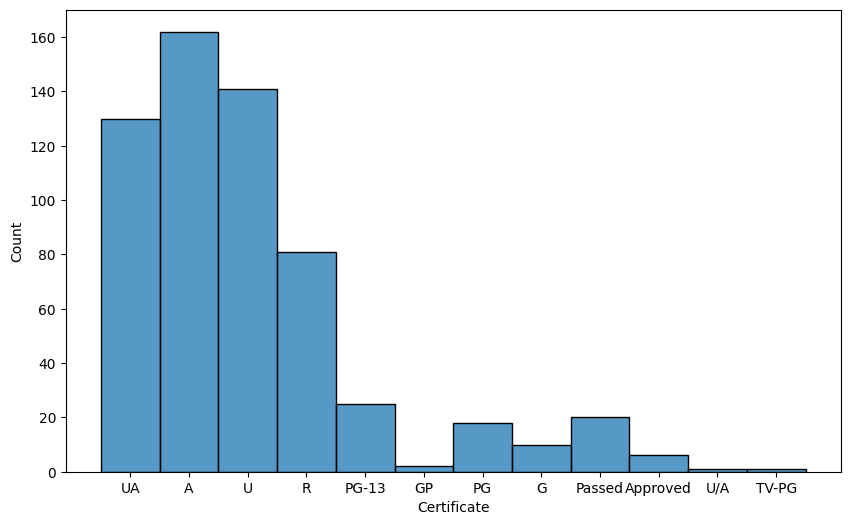

In [ ]:
#Before
# Set the size of the figure for the plot
plt.figure(figsize=(10, 6))

# Create a histogram plot using Seaborn for the 'Certificate' column in the DataFrame 'df'
sns.histplot(df['Certificate'])


<ipython-input-18-fcf557c58505>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Certificate', palette='dark') #palette='dark'


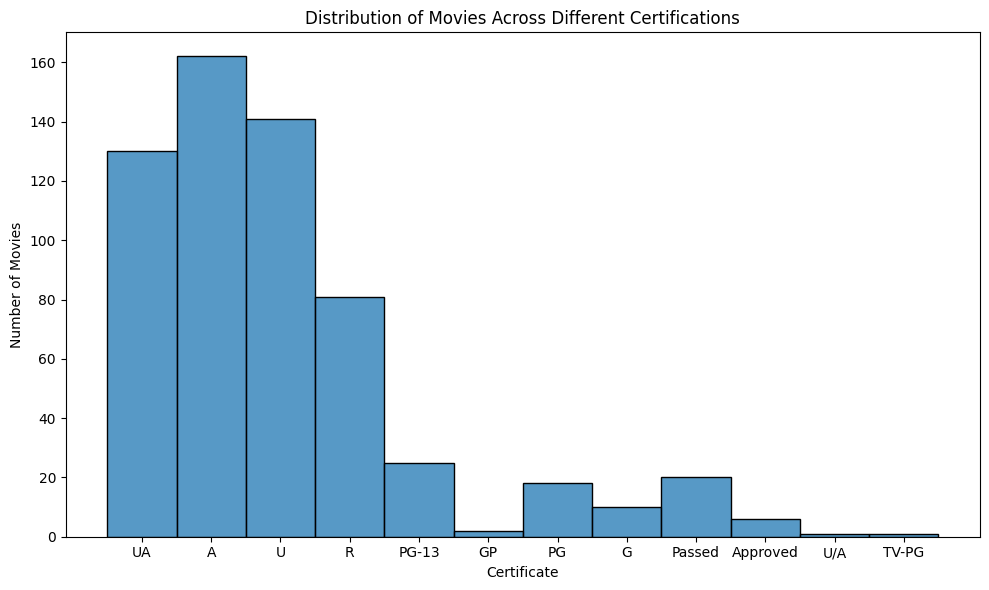

In [ ]:
#After
plt.figure(figsize=(10, 6))  # select figure size using figsize=(x, y) while x represents the width and y for height
sns.histplot(data=df, x='Certificate', palette='dark') #palette='dark'
plt.title('Distribution of Movies Across Different Certifications') # To write title on graph
plt.xlabel('Certificate') # To write x label below
plt.ylabel('Number of Movies') # To write y label left
# After creating plots, use plt.tight_layout() to adjust the layout
plt.tight_layout()

Check outliers using boxplot + u can just select the column u want to check for

<Figure size 1400x800 with 0 Axes>

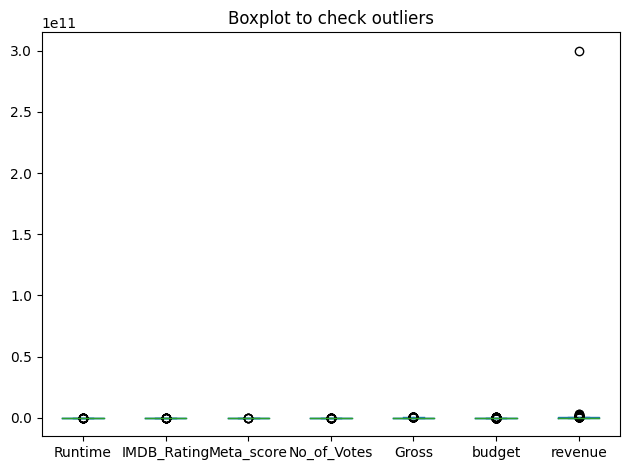

In [ ]:
# Set the size of the figure for the plot
plt.figure(figsize=(14, 8))

# Create a boxplot for all columns in the DataFrame 'df'
df.plot(kind='box')

plt.title('Boxplot to check outliers') # To write title on graph

# After creating plots, use plt.tight_layout() to adjust the layout
plt.tight_layout()

Handling missing data (Null values)

In [ ]:
# Before
# Display the count of missing (Null) values in each column
df.isnull().sum()




Series_Title      0
Certificate      25
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score       27
Director          0
No_of_Votes       0
Released_date     0
overview          0
crew              0
orig_lang         0
country           0
Gross            55
budget           18
revenue          15
dtype: int64

<Axes: >

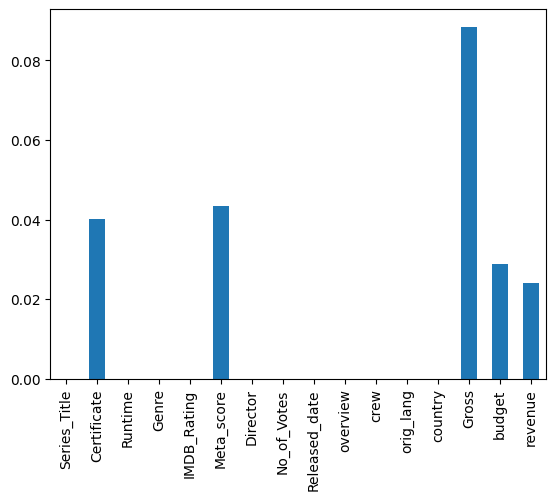

In [ ]:
# Create a bar plot representing the proportion of missing values in each column
df.isnull().mean().plot(kind='bar')

In [ ]:
# After
# Fill missing (Null) values with the mean of each column
df = df.fillna(df.mean())




<ipython-input-24-93e9891b8519>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
<ipython-input-24-93e9891b8519>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
# Calculate and display the count of missing (Null) values in each column after filling NaNs with mean
df.isnull().sum()


Series_Title      0
Certificate      25
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score        0
Director          0
No_of_Votes       0
Released_date     0
overview          0
crew              0
orig_lang         0
country           0
Gross             0
budget            0
revenue           0
dtype: int64

<Axes: >

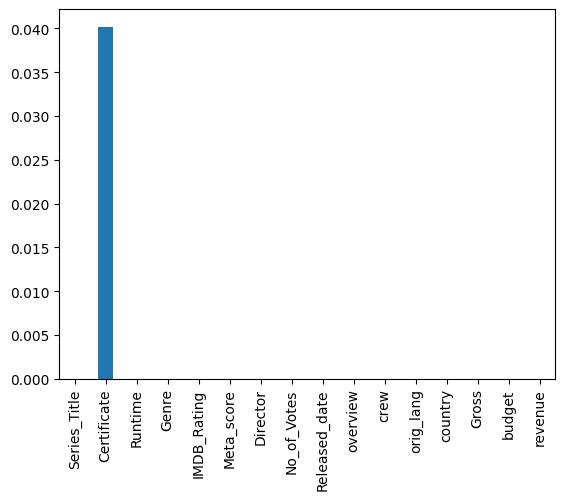

In [ ]:
# Create a bar plot representing the proportion of missing (Null) values in each column after filling NaNs with mean
df.isnull().mean().plot(kind='bar')

In [ ]:
# Fill missing (Null) values in the 'Certificate' column with the string "Unrated"
df['Certificate'] = df['Certificate'].fillna("Unrated")  # Fill NaN values with "Unrated"


In [ ]:
df.isnull().sum() # Double check


Series_Title     0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
No_of_Votes      0
Released_date    0
overview         0
crew             0
orig_lang        0
country          0
Gross            0
budget           0
revenue          0
dtype: int64

Relationship between 'budget' and 'revenue'

<Axes: xlabel='budget', ylabel='revenue'>

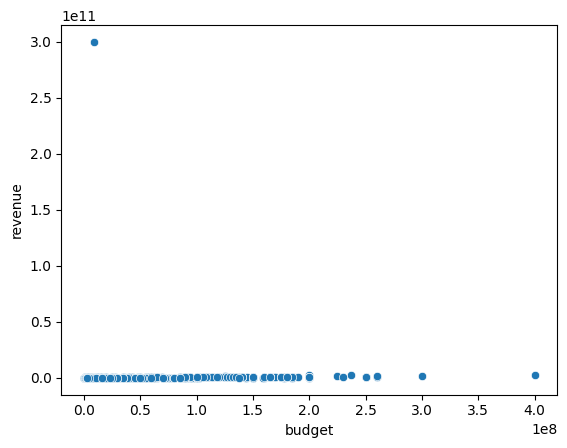

In [ ]:
#Before
# Create a scatter plot to visualize the relationship between 'budget' and 'revenue'
sns.scatterplot(data=df, x='budget', y='revenue')

Text(0, 0.5, 'Revenue')

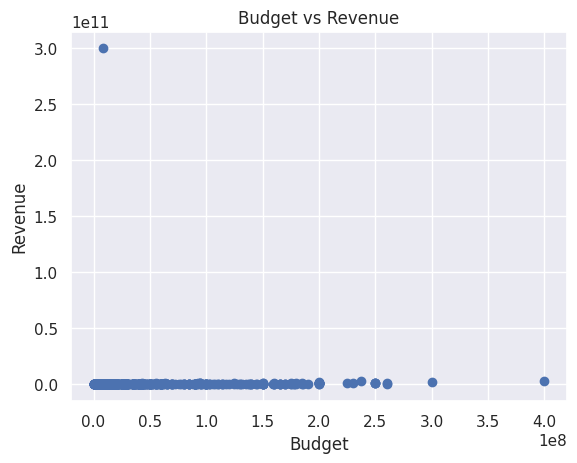

In [ ]:
#Before removing outliers but better visualization
# Create a scatter plot using Matplotlib with 'budget' on the x-axis and 'revenue' on the y-axis
plt.scatter(df['budget'], df['revenue'])

# Set the title of the plot to 'Budget vs Revenue'
plt.title('Budget vs Revenue')

# Set the label for the x-axis as 'Budget'
plt.xlabel('Budget')

# Set the label for the y-axis as 'Revenue'
plt.ylabel('Revenue')


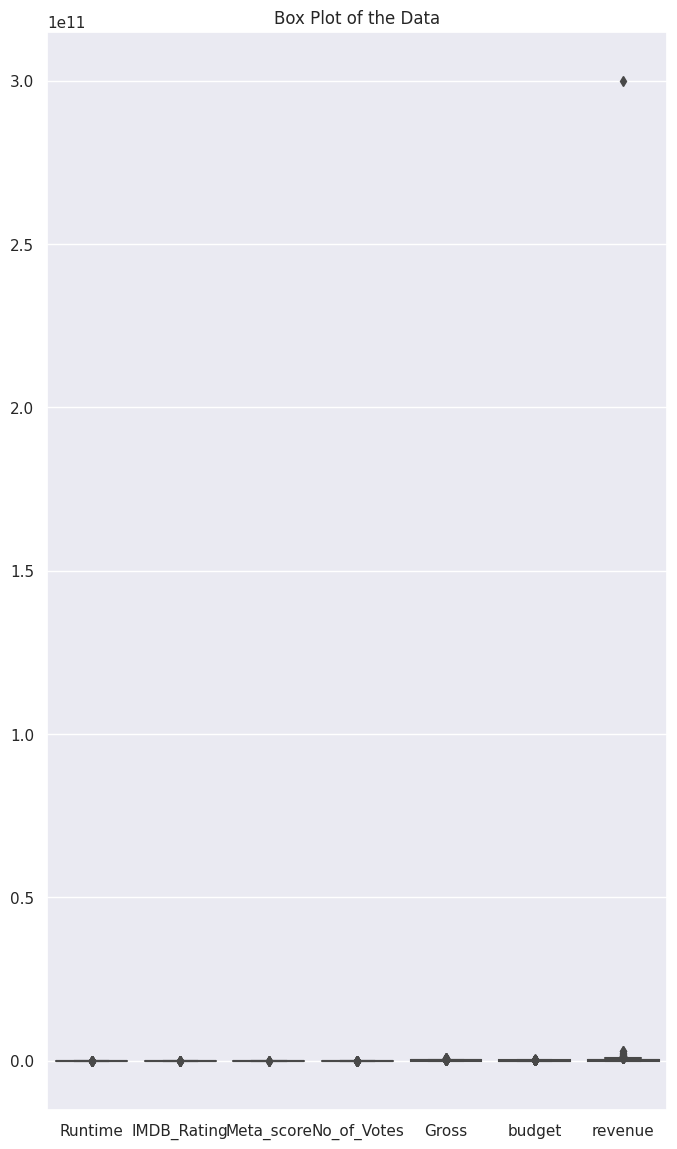

In [ ]:
#Before
# Set the figure size of the plot to 8 units in width and 14 units in height
plt.figure(figsize=(8, 14))

# Create a box plot using Seaborn with the entire DataFrame 'df'
sns.boxplot(data=df)

# Set the title of the plot as 'Box Plot of the Data'
plt.title('Box Plot of the Data')

# Show the plot
plt.show()


Read it before removing outliers to compare after>

In [ ]:
#Before removing outliers
# Display a statistical summary of the numerical columns in the DataFrame 'df'
df.describe()


,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,budget,revenue
count,622.000000,622.000000,622.000000,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02
mean,123.573955,8.020257,77.500840,3.778560e+05,9.032699e+07,4.284292e+07,7.082104e+08
std,27.051930,2.126417,12.373206,3.598134e+05,1.101757e+08,5.654433e+07,1.202446e+10
min,64.000000,1.000000,28.000000,2.519800e+04,3.296000e+03,9.900000e+02,0.000000e+00
25%,104.000000,7.700000,70.000000,1.146472e+05,1.609663e+07,6.000000e+06,2.726133e+07
50%,120.000000,7.900000,78.000000,2.579150e+05,5.469015e+07,2.000000e+07,8.496469e+07
75%,137.000000,8.100000,87.000000,5.202232e+05,1.107748e+08,5.000000e+07,3.099462e+08
max,238.000000,60.000000,100.000000,2.343110e+06,8.583730e+08,4.000000e+08,3.000000e+11


To remove outliers

 Filter the DataFrame 'df' to keep rows where the 'column' values lie within 3 standard deviations from the mean

In [ ]:
df = df[(np.abs(df['revenue'] - df['revenue'].mean()) <= 3*df['revenue'].std())]

In [ ]:
df = df[(np.abs(df['budget'] - df['budget'].mean()) <= 3*df['budget'].std())]

In [ ]:
df = df[(np.abs(df['Gross'] - df['Gross'].mean()) <= 3*df['Gross'].std())]

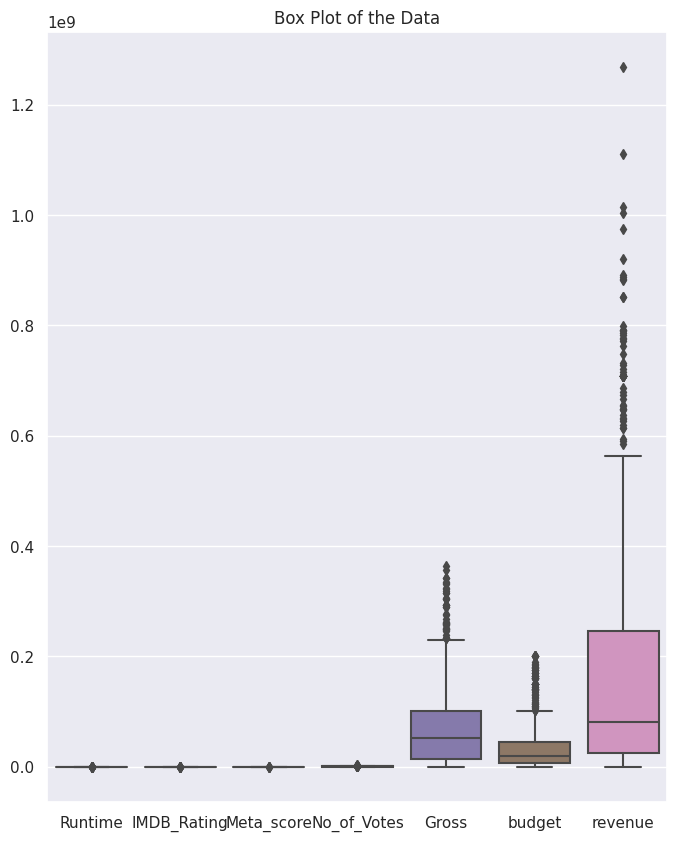

In [ ]:
#After removing outliers
plt.figure(figsize=(8, 10))
sns.boxplot(data=df)  # Assuming 'df' contains the dataset
plt.title('Box Plot of the Data')
plt.show()

In [ ]:
#After removing outliers
# Display a statistical summary of the numerical columns in the DataFrame 'df'
df.describe()


,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,budget,revenue
count,599.000000,599.000000,599.000000,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02
mean,122.954925,8.019533,77.456632,3.608597e+05,7.661324e+07,3.698856e+07,1.856375e+08
std,26.742416,2.165564,12.487443,3.419433e+05,7.879143e+07,4.555668e+07,2.347086e+08
min,64.000000,1.000000,28.000000,2.519800e+04,3.296000e+03,9.900000e+02,0.000000e+00
25%,103.500000,7.700000,70.000000,1.120085e+05,1.408058e+07,6.000000e+06,2.519859e+07
50%,120.000000,7.900000,77.500840,2.476660e+05,5.236401e+07,1.900000e+07,8.050113e+07
75%,137.000000,8.100000,87.000000,5.008630e+05,1.005192e+08,4.400000e+07,2.458885e+08
max,238.000000,60.000000,100.000000,2.343110e+06,3.630707e+08,2.000000e+08,1.268697e+09


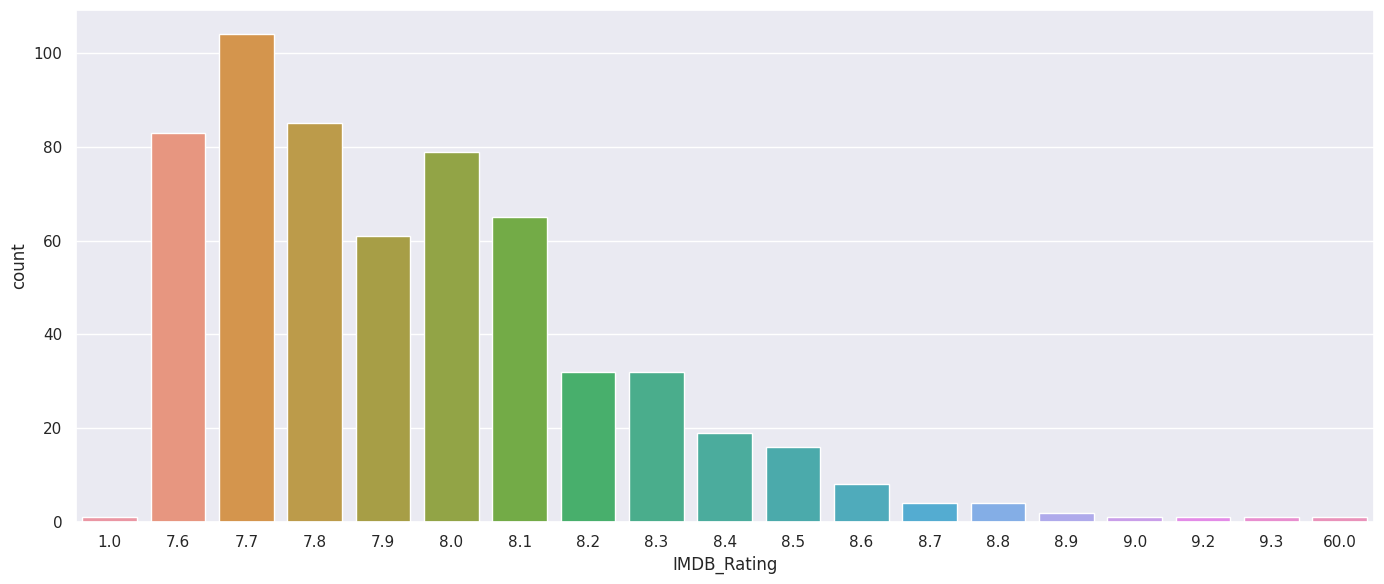

In [ ]:
#Before removing outliers
# Sort the DataFrame 'df' by 'IMDB_Rating' values from lowest to largest and extract the sorted column
sorted_ratings = df.sort_values('IMDB_Rating')['IMDB_Rating']

# Create a new figure for the plot with a specific size (width=14, height=6)
plt.figure(figsize=(14, 6))

# Create a count plot using Seaborn to visualize the distribution of 'IMDB_Rating'
sns.countplot(data=df, x='IMDB_Rating')

# Adjust the layout for better spacing of plot elements
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df = df[(np.abs(df['IMDB_Rating'] - df['IMDB_Rating'].mean()) <= 3*df['IMDB_Rating'].std())] # Outliers removed

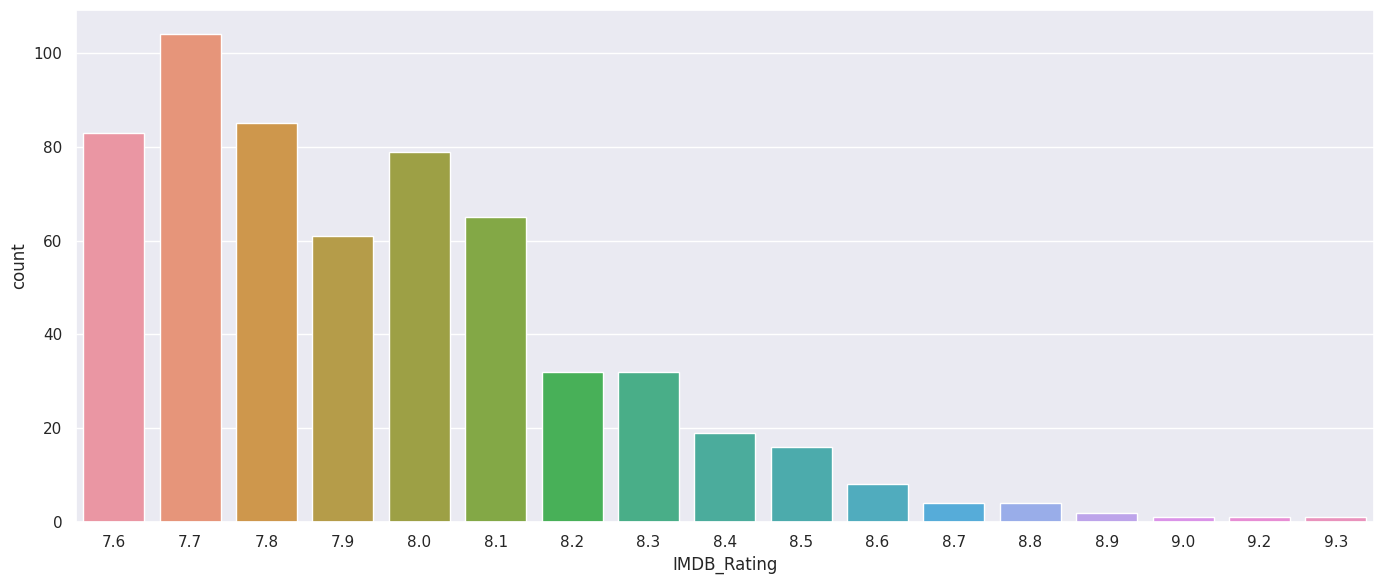

In [ ]:
#After removing outliers
# Sort the DataFrame 'df' by 'IMDB_Rating' values from lowest to largest and extract the sorted column
sorted_ratings = df.sort_values('IMDB_Rating')['IMDB_Rating']

# Create a new figure for the plot with a specific size (width=14, height=6)
plt.figure(figsize=(14, 6))

# Create a count plot using Seaborn to visualize the distribution of 'IMDB_Rating'
sns.countplot(data=df, x='IMDB_Rating')

# Adjust the layout for better spacing of plot elements
plt.tight_layout()

# Display the plot
plt.show()


1. Financial Analysis:



    Examine the relationship between budget and revenue to determine the profitability of movies.

Text(0, 0.5, 'Revenue')

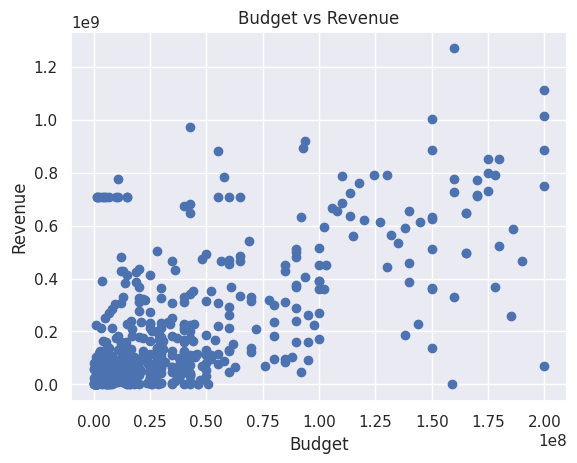

In [ ]:
#After removing outliers
# Create a scatter plot using Matplotlib with 'budget' on the x-axis and 'revenue' on the y-axis
plt.scatter(df['budget'], df['revenue'])

# Set the title of the plot to 'Budget vs Revenue'
plt.title('Budget vs Revenue')

# Set the label for the x-axis as 'Budget'
plt.xlabel('Budget')

# Set the label for the y-axis as 'Revenue'
plt.ylabel('Revenue')



  
    Distribution of Gross across different release years.

<ipython-input-44-1db2fee5ec27>:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Release_Year', y='Gross', palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of th

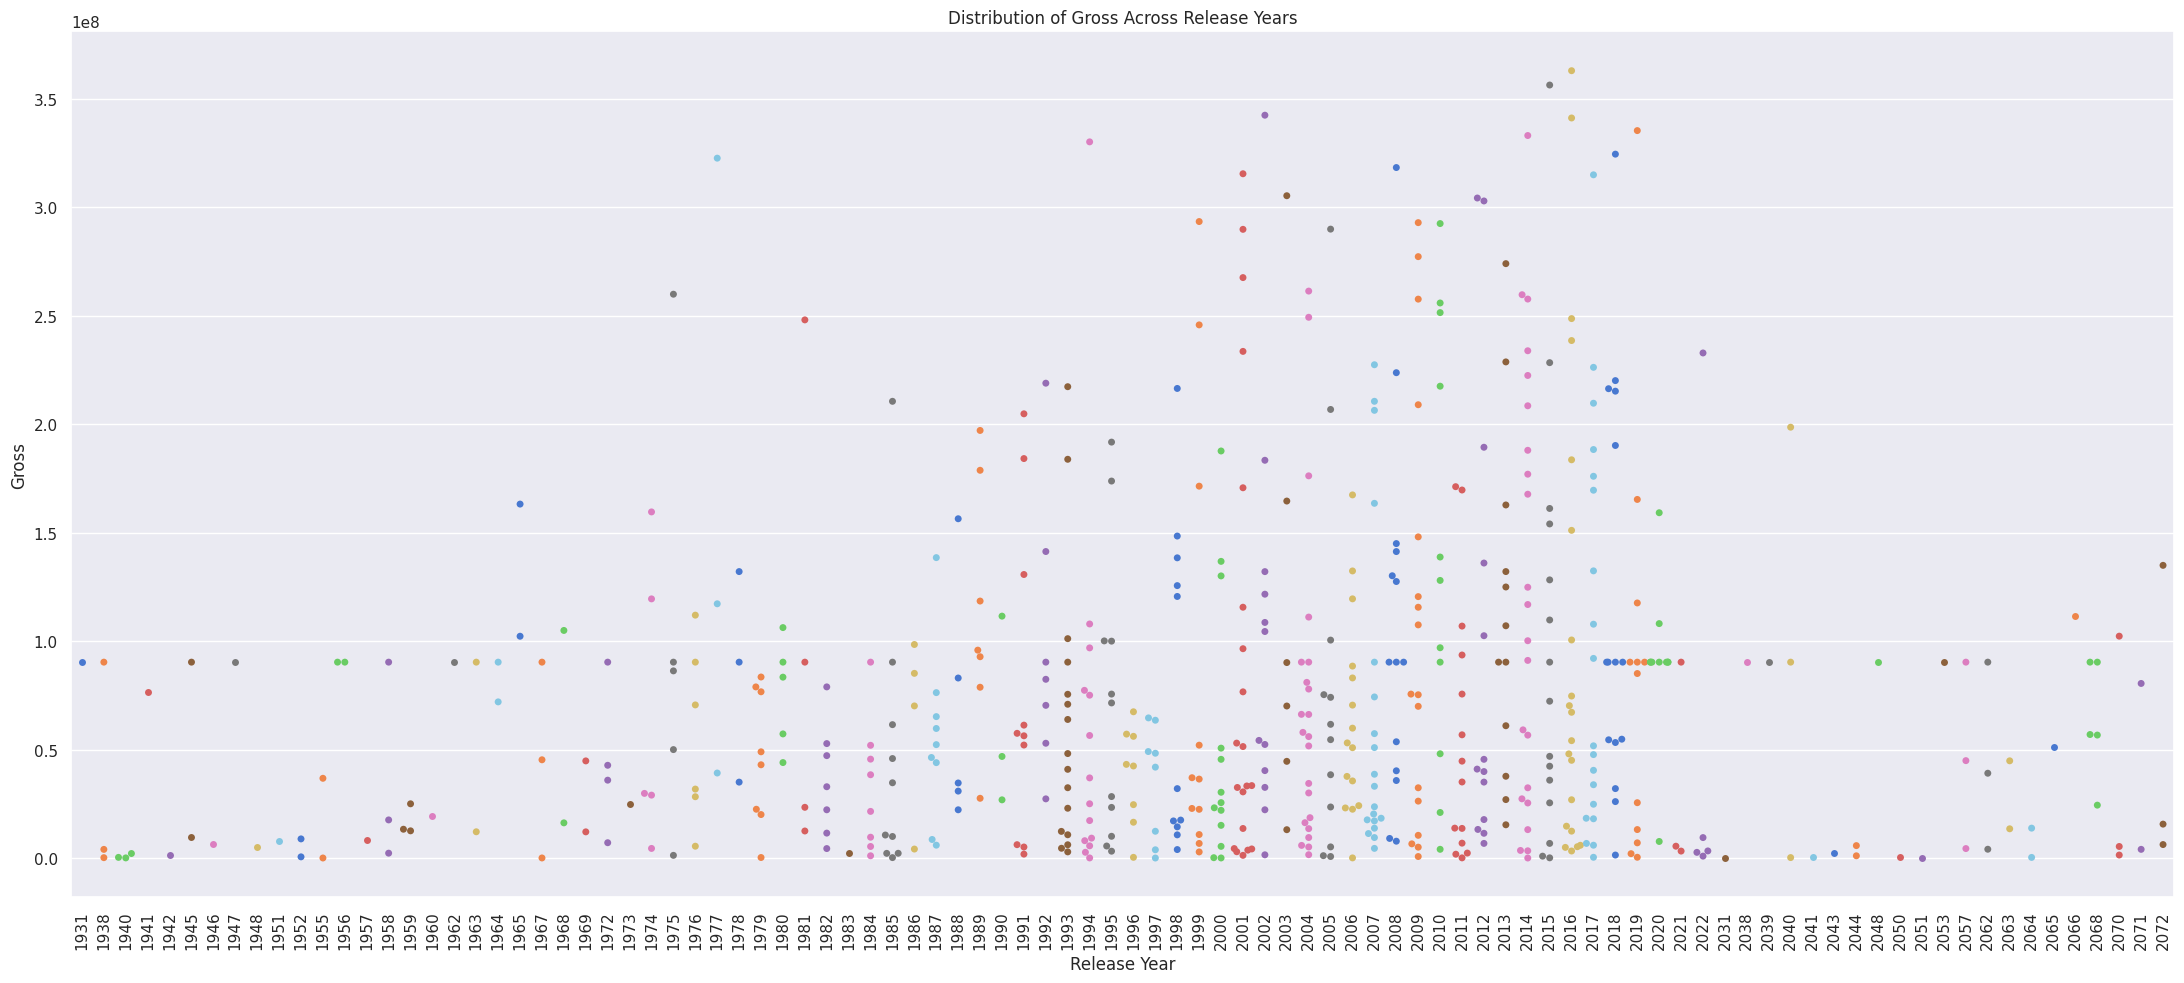

In [ ]:
#Before doing filter on years range
# Assuming 'Released_date' is a datetime column, extract the year and create a new 'Release_Year' column
df['Release_Year'] = df['Released_date'].dt.year

# Create a new figure for the plot with a specific size (width=22, height=10)
plt.figure(figsize=(22, 10))

# Create a swarm plot using Seaborn to visualize the distribution of 'Gross' across 'Release_Year'
sns.swarmplot(data=df, x='Release_Year', y='Gross', palette='muted')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the title of the plot to describe the content
plt.title('Distribution of Gross Across Release Years')

# Label the x-axis as 'Release Year'
plt.xlabel('Release Year')

# Label the y-axis as 'Gross'
plt.ylabel('Gross')

# Adjust the layout for better spacing and alignment of plot elements
plt.tight_layout()


In [ ]:
# Filter the DataFrame 'df' to include rows where the 'Release_Year' values are less than or equal to 2024
df = df[df['Release_Year'] <= 2024]


<ipython-input-46-8e388c8d653e>:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Release_Year', y='Gross', palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the

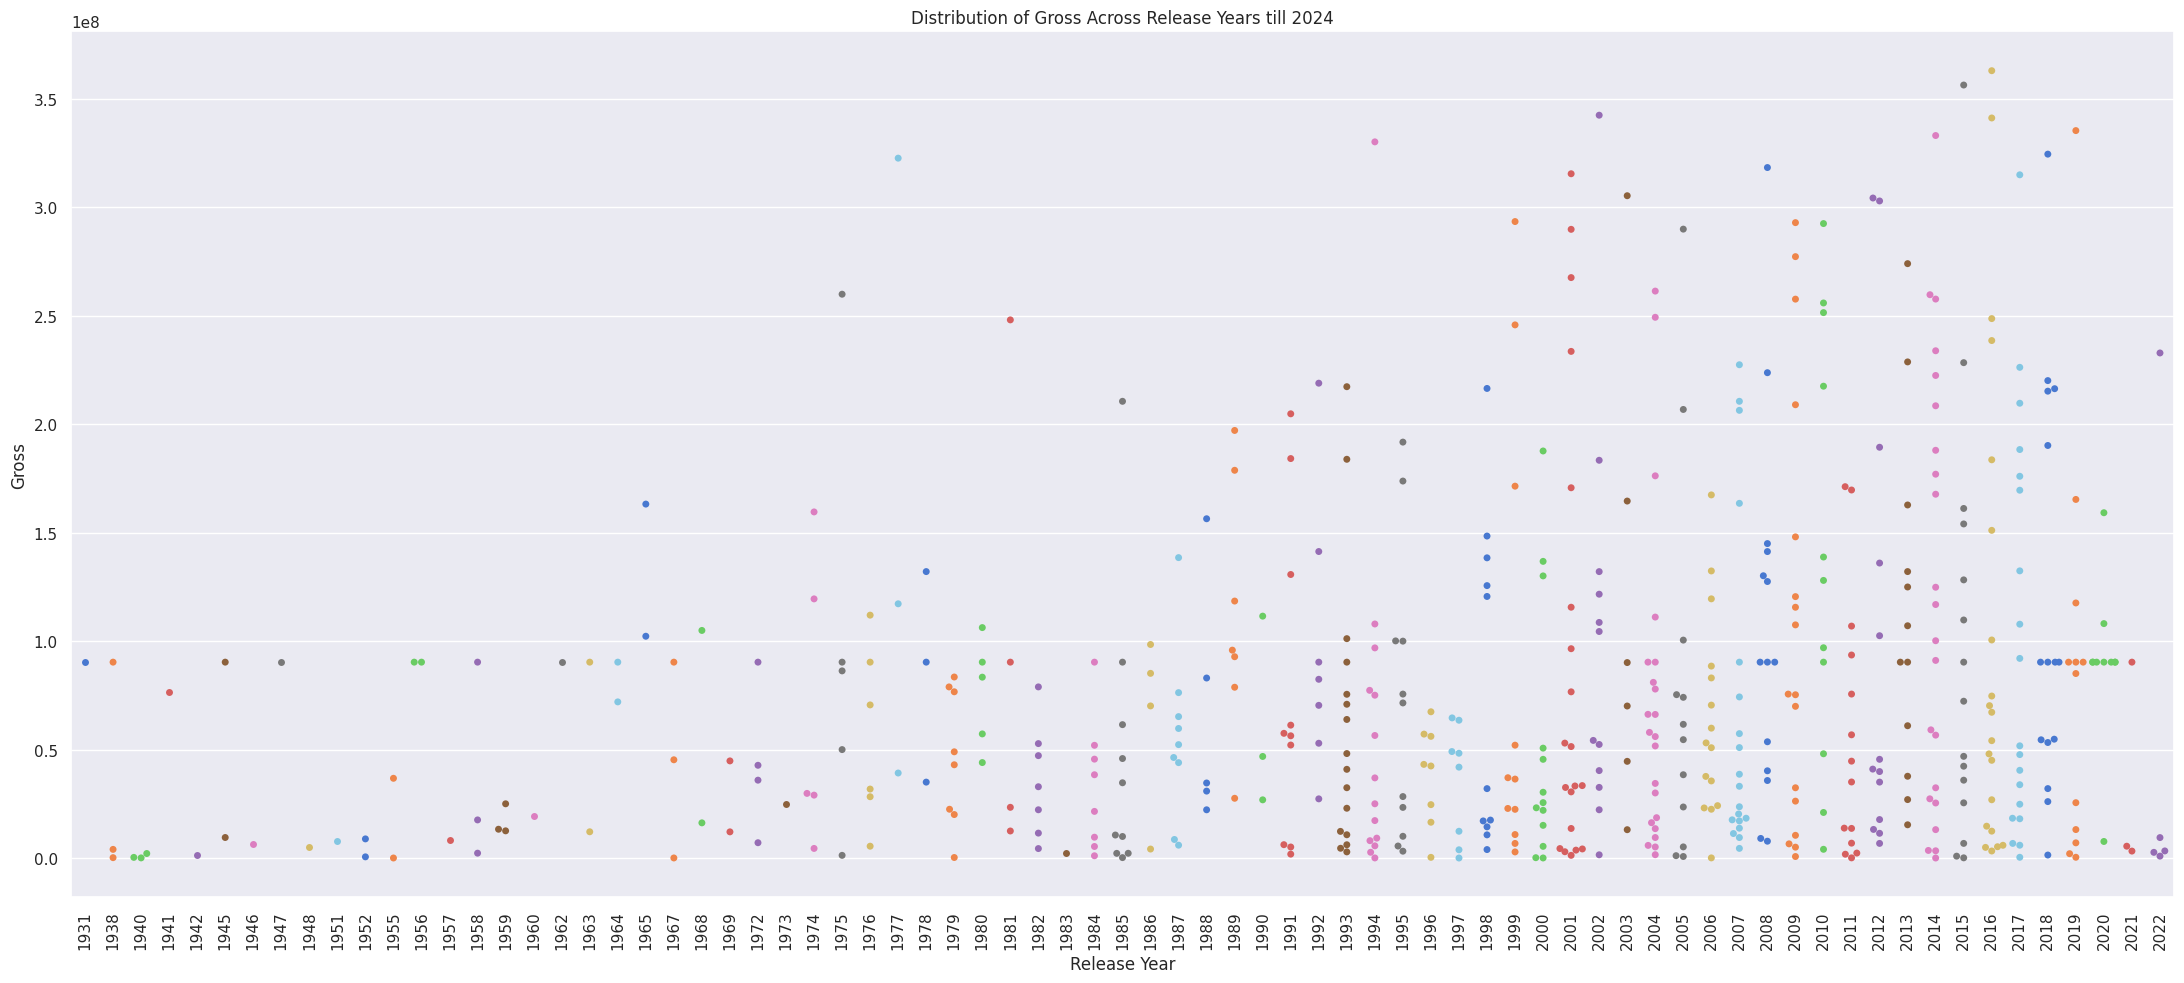

In [ ]:
#After doing filter on years range
# Assuming 'Released_date' is a datetime column, extract the year and create a new 'Release_Year' column
df['Release_Year'] = df['Released_date'].dt.year

# Create a new figure for the plot with a specific size (width=22, height=10)
plt.figure(figsize=(22, 10))

# Create a swarm plot using Seaborn to visualize the distribution of 'Gross' across 'Release_Year'
sns.swarmplot(data=df, x='Release_Year', y='Gross', palette='muted')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the title of the plot to describe the content
plt.title('Distribution of Gross Across Release Years till 2024')

# Label the x-axis as 'Release Year'
plt.xlabel('Release Year')

# Label the y-axis as 'Gross'
plt.ylabel('Gross')

# Adjust the layout for better spacing and alignment of plot elements
plt.tight_layout()



2. Market Analysis:

    Distribution of revenue across different countries.

<ipython-input-47-453a4513f46d>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y='revenue', estimator=sum, ci=None)


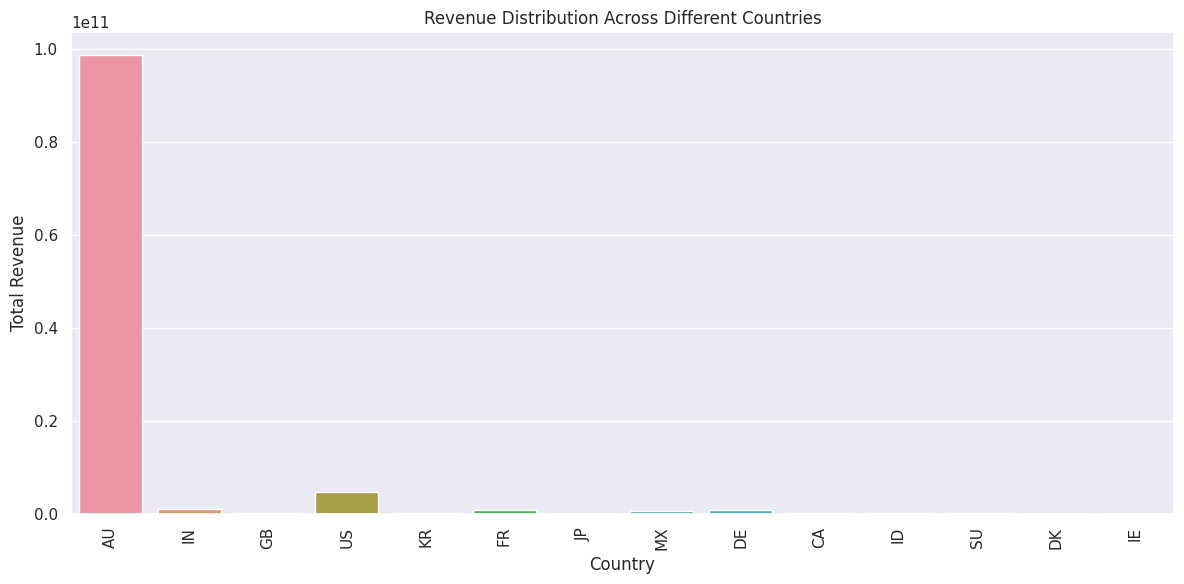

In [ ]:
# Create a new figure for the plot with a specific size (width=12, height=6)
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn to visualize the total 'revenue' across different 'country' categories
# Estimator=sum calculates the total revenue for each country, ci=None removes confidence intervals
sns.barplot(data=df, x='country', y='revenue', estimator=sum, ci=None)

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the title of the plot to describe the content
plt.title('Revenue Distribution Across Different Countries')

# Label the x-axis as 'Country'
plt.xlabel('Country')

# Label the y-axis as 'Total Revenue'
plt.ylabel('Total Revenue')

# Adjust the layout for better spacing and alignment of plot elements
plt.tight_layout()


3. Language Analysis:

    Distribution of movies based on the original language.


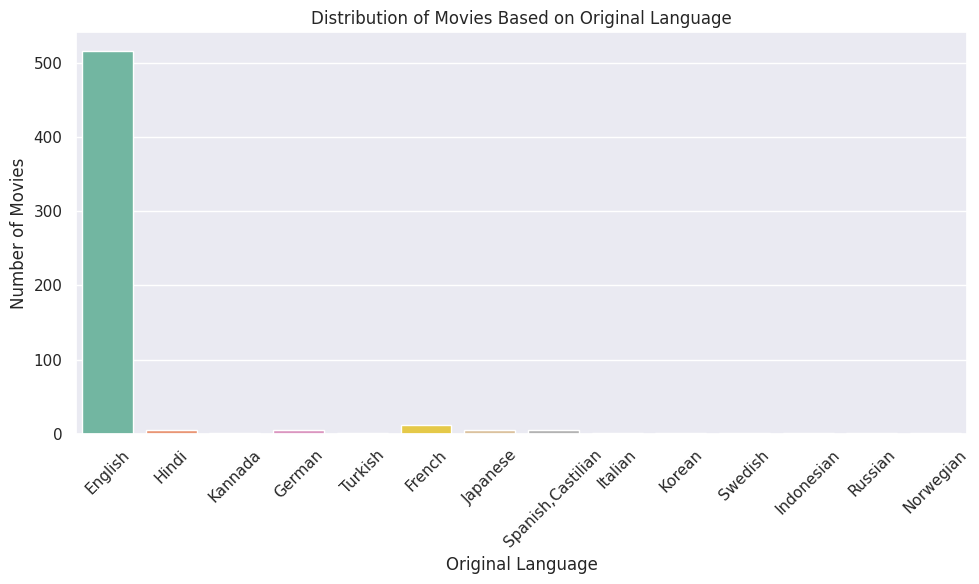

In [ ]:
# Create a new figure for the plot with a specific size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Create a count plot using Seaborn to visualize the distribution of 'orig_lang'
sns.countplot(data=df, x='orig_lang', palette='Set2')

# Set the title of the plot to describe the content
plt.title('Distribution of Movies Based on Original Language')

# Label the x-axis as 'Original Language'
plt.xlabel('Original Language')

# Label the y-axis as 'Number of Movies'
plt.ylabel('Number of Movies')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout for better spacing and alignment of plot elements
plt.tight_layout()


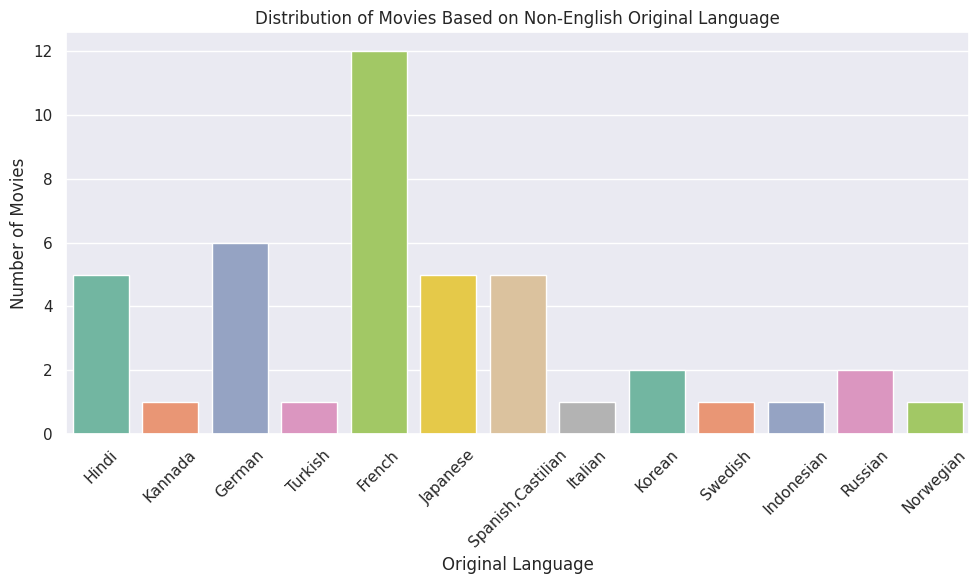

In [ ]:
# Create a new figure for the plot with a specific size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Filter the DataFrame 'df' to exclude movies with English as the original language
non_english_df = df[df['orig_lang'] != 'English']

# Create a count plot using Seaborn to visualize the distribution of non-English 'orig_lang'
sns.countplot(data=non_english_df, x='orig_lang', palette='Set2')

# Set the title of the plot to describe the content
plt.title('Distribution of Movies Based on Non-English Original Language')

# Label the x-axis as 'Original Language'
plt.xlabel('Original Language')

# Label the y-axis as 'Number of Movies'
plt.ylabel('Number of Movies')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout for better spacing and alignment of plot elements
plt.tight_layout()


Save your progress in a new file

In [ ]:
df.to_csv('cleaned_file.csv', index=False)